In [1]:
import numpy as np
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier
import lightgbm as lgb

In [2]:
def clean_sequence(sequence):
    
    "Remove non-standard amino acids (e.g., U, X) from the sequence."
    standard_amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    return ''.join([aa for aa in sequence if aa in standard_amino_acids])

In [10]:
def extract_properties(sequence):
    
    cleaned_sequence = clean_sequence(sequence)
    analysis = ProteinAnalysis(cleaned_sequence)
    properties = {
        "Molecular Weight": analysis.molecular_weight(),
        "Isoelectric Point": analysis.isoelectric_point(),
        "Aromaticity": analysis.aromaticity(),
        "Instability Index": analysis.instability_index(),
        "Hydrophobicity": analysis.gravy(),
        "Amino Acid Composition": analysis.count_amino_acids(),
        "ph_5.5": analysis.charge_at_pH(5.5),
        "ph_7": analysis.charge_at_pH(7),
        "ph_8.5": analysis.charge_at_pH(8.5),
        "Length": len(cleaned_sequence),
    }
    return properties

In [11]:
def properties(file_path, output_path):
    df = pd.read_csv(file_path)
    results = []
    for index, row in df.iterrows():
        protein_1 = row['protein_sequences_1']
        protein_2 = row['protein_sequences_2']

        protein_1_properties = extract_properties(protein_1)
        protein_2_properties = extract_properties(protein_2)

        results.append({
            "Protein_1": protein_1,
            "Protein_1_Molecular_Weight": protein_1_properties["Molecular Weight"],
            "Protein_1_Isoelectric_Point": protein_1_properties["Isoelectric Point"],
            "Protein_1_Aromaticity": protein_1_properties["Aromaticity"],
            "Protein_1_Instability_Index": protein_1_properties["Instability Index"],
            "Protein_1_Hydrophobicity": protein_1_properties["Hydrophobicity"],
            "Protein_1_chargeAT_ph5.5": protein_1_properties["ph_5.5"],
            "Protein_1_chargeAT_ph7": protein_1_properties["ph_7"],
            "Protein_1_chargeAT_ph8.5": protein_1_properties["ph_8.5"],
            "Protein_1_len": protein_1_properties["Length"],
            "Protein_2": protein_2,
            "Protein_2_Molecular_Weight": protein_2_properties["Molecular Weight"],
            "Protein_2_Isoelectric_Point": protein_2_properties["Isoelectric Point"],
            "Protein_2_Aromaticity": protein_2_properties["Aromaticity"],
            "Protein_2_Instability_Index": protein_2_properties["Instability Index"],
            "Protein_2_Hydrophobicity": protein_2_properties["Hydrophobicity"],
            "Protein_2_chargeAT_ph5.5": protein_2_properties["ph_5.5"],
            "Protein_2_chargeAT_ph7": protein_2_properties["ph_7"],
            "Protein_2_chargeAT_ph8.5": protein_2_properties["ph_8.5"],
            "Protein_2_len": protein_2_properties["Length"],
        })
    
    result_df = pd.DataFrame(results)
    result_df.to_csv(output_path, index=False)
    print(f"Processed data saved to {output_path}")

In [12]:
pos_pp_file = "positive_protein_sequences.csv"
neg_pp_file = "negative_protein_sequences.csv" 

In [13]:
pos_pp_output = "interacting_properties.csv"
neg_pp_output = "non_interacting_properties.csv"

In [14]:
properties(pos_pp_file, pos_pp_output)

Processed data saved to interacting_properties.csv


In [15]:
properties(neg_pp_file, neg_pp_output)

Processed data saved to non_interacting_properties.csv


In [2]:
pos_pp_df = pd.read_csv("interacting_properties.csv")
neg_pp_df = pd.read_csv("non_interacting_properties.csv")

In [3]:
neg_pp_df.head()

,Protein_1,Protein_1_Molecular_Weight,Protein_1_Isoelectric_Point,Protein_1_Aromaticity,Protein_1_Instability_Index,Protein_1_Hydrophobicity,Protein_1_chargeAT_ph5.5,Protein_1_chargeAT_ph7,Protein_1_chargeAT_ph8.5,Protein_1_len,Protein_2,Protein_2_Molecular_Weight,Protein_2_Isoelectric_Point,Protein_2_Aromaticity,Protein_2_Instability_Index,Protein_2_Hydrophobicity,Protein_2_chargeAT_ph5.5,Protein_2_chargeAT_ph7,Protein_2_chargeAT_ph8.5,Protein_2_len
0,MSVEMDSSSFIQFDVPEYSSTVLSQLNELRLQGKLCDIIVHIQGQP...,55979.9788,5.927363,0.069444,52.869444,-0.526587,6.444741,-9.973347,-16.449064,504,MGDTFIRHIALLGFEKRFVPSQHYVYMFLVKWQDLSEKVVYRRFTE...,44682.2911,9.123260,0.089744,63.788462,-0.688974,17.080529,8.222904,4.860815,390
1,MPITRMRMRPWLEMQINSNQIPGLIWINKEEMIFQIPWKHAAKHGW...,36501.8064,5.223526,0.070769,53.833538,-0.673538,-2.609265,-9.063451,-12.317297,325,MTMPVNGAHKDADLWSSHDKMLAQPLKDSDVEVYNIIKKESNRQRV...,53082.0193,7.609797,0.078675,37.642671,-0.250932,16.238639,1.857032,-3.829808,483
2,MLCVRGARLKRELDATATVLANRQDESEQSRKRLIEQSREFKKNTP...,164270.6054,5.755369,0.037874,68.553362,-0.787243,7.976327,-16.828774,-24.564000,1505,MRLTLLCCTWREERMGEEGSELPVCASCGQRIYDGQYLQALNADWH...,72584.2465,6.534290,0.075734,41.639413,-0.370170,19.082248,-4.311749,-15.217824,647
3,MDALESLLDEVALEGLDGLCLPALWSRLETRVPPFPLPLEPCTQEF...,238872.0565,7.010885,0.069227,52.819976,-0.538644,46.065899,0.116860,-19.002371,2109,MERLQKQPLTSPGSVSPSRDSSVPGSPSSIVAKMDNQVLGYKDLAA...,45513.8515,8.942361,0.054321,72.040494,-0.894321,15.547986,5.356610,2.406108,405
4,MALSRGLPRELAEAVAGGRVLVVGAGGIGCELLKNLVLTGFSHIDL...,71222.7900,5.146737,0.059375,42.736578,-0.443906,-7.797759,-21.497017,-27.151013,640,MVVMNSLRVILQASPGKLLWRKFQIPRFMPARPCSLYTCTYKTRNR...,36433.2671,7.695568,0.107256,43.220189,-0.404101,12.833506,1.615834,-2.263794,317


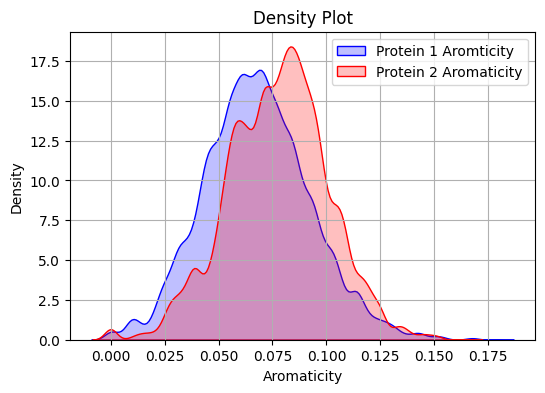

In [4]:
plt.figure(figsize=(6, 4))
sns.kdeplot(neg_pp_df['Protein_1_Aromaticity'], label='Protein 1 Aromticity', fill=True, color="blue")
sns.kdeplot(neg_pp_df['Protein_2_Aromaticity'], label='Protein 2 Aromaticity', fill=True, color="red")
plt.title(f'Density Plot')
plt.xlabel('Aromaticity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

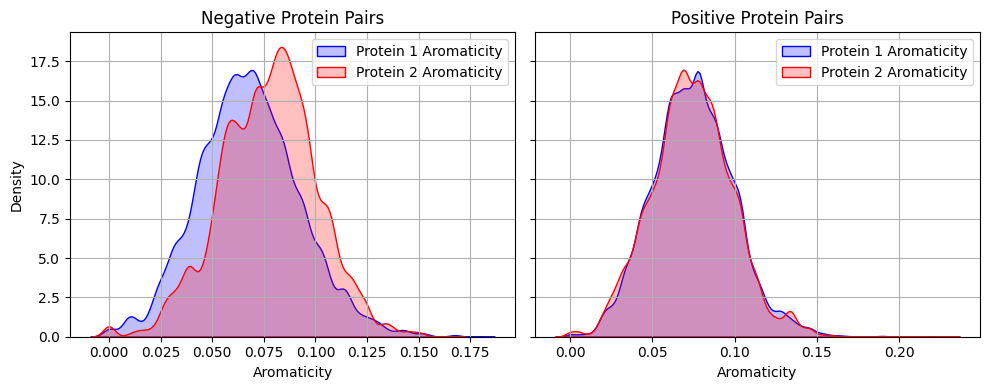

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.kdeplot(neg_pp_df['Protein_1_Aromaticity'], label='Protein 1 Aromaticity', fill=True, color="blue", ax=axes[0])
sns.kdeplot(neg_pp_df['Protein_2_Aromaticity'], label='Protein 2 Aromaticity', fill=True, color="red", ax=axes[0])
axes[0].set_title('Negative Protein Pairs')
axes[0].set_xlabel('Aromaticity')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

sns.kdeplot(pos_pp_df['Protein_1_Aromaticity'], label='Protein 1 Aromaticity', fill=True, color="blue", ax=axes[1])
sns.kdeplot(pos_pp_df['Protein_2_Aromaticity'], label='Protein 2 Aromaticity', fill=True, color="red", ax=axes[1])
axes[1].set_title('Positive Protein Pairs')
axes[1].set_xlabel('Aromaticity')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

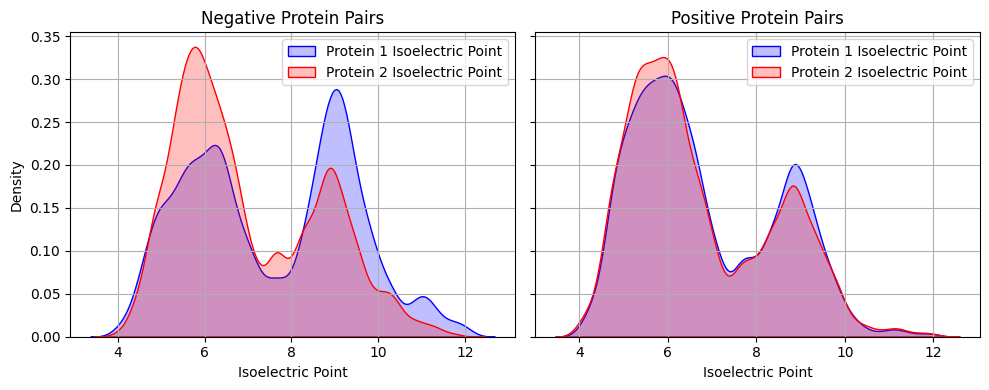

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.kdeplot(neg_pp_df['Protein_1_Isoelectric_Point'], label='Protein 1 Isoelectric Point', fill=True, color="blue", ax=axes[0])
sns.kdeplot(neg_pp_df['Protein_2_Isoelectric_Point'], label='Protein 2 Isoelectric Point', fill=True, color="red", ax=axes[0])
axes[0].set_title('Negative Protein Pairs')
axes[0].set_xlabel('Isoelectric Point')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

sns.kdeplot(pos_pp_df['Protein_1_Isoelectric_Point'], label='Protein 1 Isoelectric Point', fill=True, color="blue", ax=axes[1])
sns.kdeplot(pos_pp_df['Protein_2_Isoelectric_Point'], label='Protein 2 Isoelectric Point', fill=True, color="red", ax=axes[1])
axes[1].set_title('Positive Protein Pairs')
axes[1].set_xlabel('Isoelectric Point')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

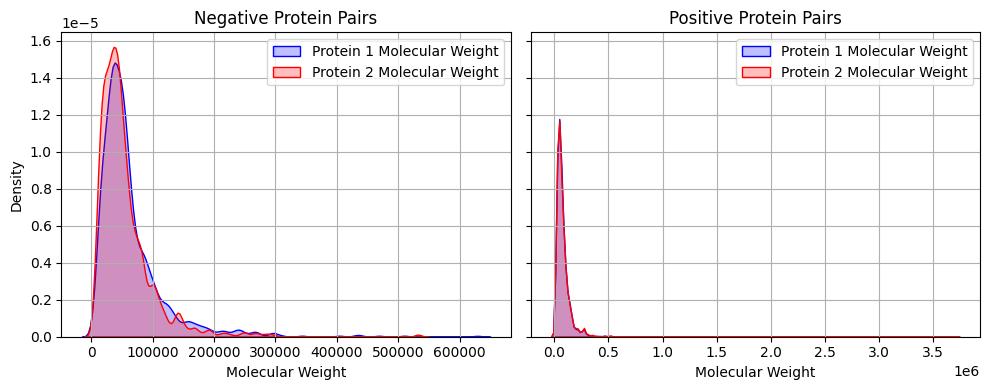

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.kdeplot(neg_pp_df['Protein_1_Molecular_Weight'], label='Protein 1 Molecular Weight', fill=True, color="blue", ax=axes[0])
sns.kdeplot(neg_pp_df['Protein_2_Molecular_Weight'], label='Protein 2 Molecular Weight', fill=True, color="red", ax=axes[0])
axes[0].set_title('Negative Protein Pairs')
axes[0].set_xlabel('Molecular Weight')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

sns.kdeplot(pos_pp_df['Protein_1_Molecular_Weight'], label='Protein 1 Molecular Weight', fill=True, color="blue", ax=axes[1])
sns.kdeplot(pos_pp_df['Protein_2_Molecular_Weight'], label='Protein 2 Molecular Weight', fill=True, color="red", ax=axes[1])
axes[1].set_title('Positive Protein Pairs')
axes[1].set_xlabel('Molecular Weight')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

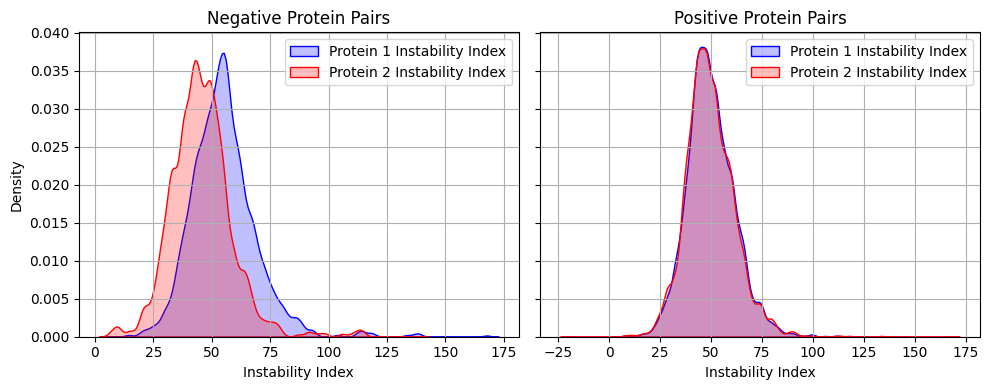

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.kdeplot(neg_pp_df['Protein_1_Instability_Index'], label='Protein 1 Instability Index', fill=True, color="blue", ax=axes[0])
sns.kdeplot(neg_pp_df['Protein_2_Instability_Index'], label='Protein 2 Instability Index', fill=True, color="red", ax=axes[0])
axes[0].set_title('Negative Protein Pairs')
axes[0].set_xlabel('Instability Index')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

sns.kdeplot(pos_pp_df['Protein_1_Instability_Index'], label='Protein 1 Instability Index', fill=True, color="blue", ax=axes[1])
sns.kdeplot(pos_pp_df['Protein_2_Instability_Index'], label='Protein 2 Instability Index', fill=True, color="red", ax=axes[1])
axes[1].set_title('Positive Protein Pairs')
axes[1].set_xlabel('Instability Index')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

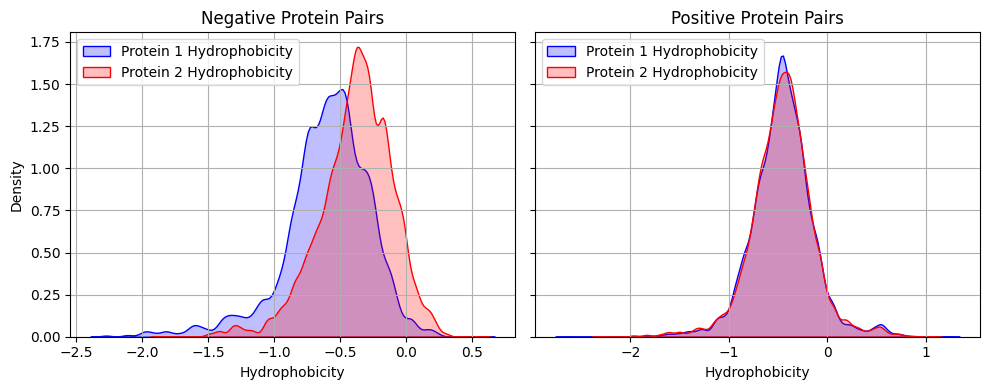

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.kdeplot(neg_pp_df['Protein_1_Hydrophobicity'], label='Protein 1 Hydrophobicity', fill=True, color="blue", ax=axes[0])
sns.kdeplot(neg_pp_df['Protein_2_Hydrophobicity'], label='Protein 2 Hydrophobicity', fill=True, color="red", ax=axes[0])
axes[0].set_title('Negative Protein Pairs')
axes[0].set_xlabel('Hydrophobicity')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

sns.kdeplot(pos_pp_df['Protein_1_Hydrophobicity'], label='Protein 1 Hydrophobicity', fill=True, color="blue", ax=axes[1])
sns.kdeplot(pos_pp_df['Protein_2_Hydrophobicity'], label='Protein 2 Hydrophobicity', fill=True, color="red", ax=axes[1])
axes[1].set_title('Positive Protein Pairs')
axes[1].set_xlabel('Hydrophobicity')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [10]:
pos_pp_df['Class'] = 1
neg_pp_df['Class'] = 0

In [11]:
df = pd.concat([pos_pp_df, neg_pp_df], axis=0)
df = df.reset_index(drop=True)

In [12]:
np.random.seed(42)
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df = df.drop(['Protein_1','Protein_2'], axis=1)

In [14]:
df.head()

,Protein_1_Molecular_Weight,Protein_1_Isoelectric_Point,Protein_1_Aromaticity,Protein_1_Instability_Index,Protein_1_Hydrophobicity,Protein_1_chargeAT_ph5.5,Protein_1_chargeAT_ph7,Protein_1_chargeAT_ph8.5,Protein_1_len,Protein_2_Molecular_Weight,Protein_2_Isoelectric_Point,Protein_2_Aromaticity,Protein_2_Instability_Index,Protein_2_Hydrophobicity,Protein_2_chargeAT_ph5.5,Protein_2_chargeAT_ph7,Protein_2_chargeAT_ph8.5,Protein_2_len,Class
0,18076.5838,8.952354,0.085366,36.111585,-0.186585,9.853474,4.904849,2.229435,164,89785.6725,5.676533,0.082007,38.930245,-0.390453,3.415845,-15.764213,-22.878225,817,1
1,284278.6006,5.215910,0.066343,42.388232,-0.785680,-30.633652,-106.698032,-124.369098,2472,104484.7334,6.497402,0.074236,52.145961,-0.379694,20.136843,-4.442759,-13.574250,916,1
2,58025.3318,6.250891,0.107280,35.371130,-0.250192,10.118606,-5.858601,-10.850541,522,104940.5928,4.743294,0.051760,49.818944,-0.330331,-33.402468,-58.414843,-68.406696,966,0
3,28768.4775,4.573231,0.061303,45.154023,-0.094636,-12.269550,-17.235771,-20.106691,261,48336.9105,7.088470,0.057737,50.592379,-0.239261,9.338729,0.213172,-3.649975,433,1
4,272327.2283,5.315151,0.079935,40.357416,-0.514130,-11.409031,-62.306642,-87.553239,2477,129312.2990,9.076907,0.031479,23.378558,-0.648097,31.118418,13.885888,7.875070,1366,1


In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

LightGBM

In [18]:
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, num_leaves=255)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 22033, number of negative: 21833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 43866, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502280 -> initscore=0.009119
[LightGBM] [Info] Start training from score 0.009119


LGBMClassifier(learning_rate=0.01, n_estimators=500, num_leaves=255)

In [19]:
y_pred = lgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9778758035836411


In [20]:
lgbm_cm = confusion_matrix(y_test, y_pred)

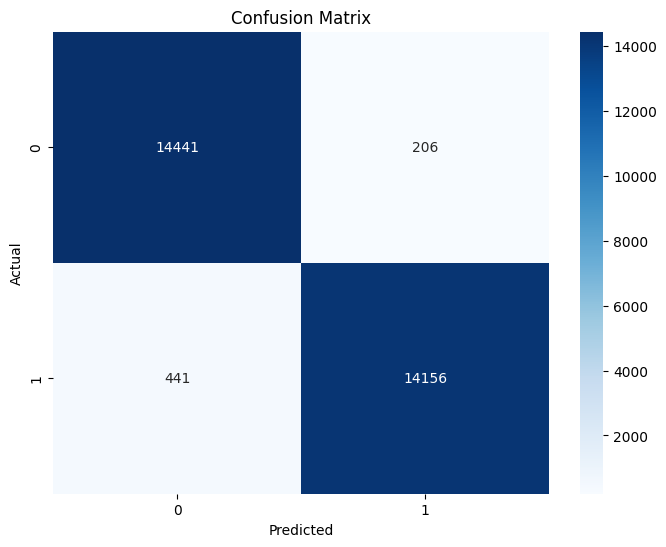

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(lgbm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=lgb_model.classes_, yticklabels=lgb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

XGBoost

In [125]:
xg_model = XGBClassifier(n_estimators=1000, random_state=42, reg_lambda=5)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [130]:
y_pred = xg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9843728628094652


In [131]:
cm = confusion_matrix(y_test, y_pred)

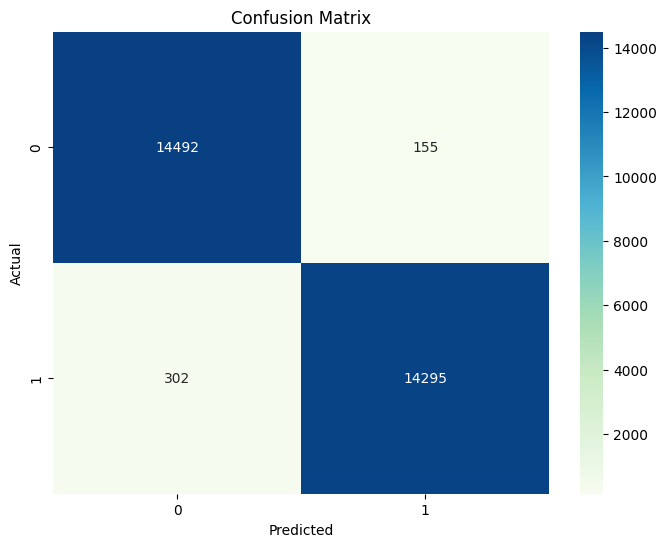

In [132]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=xg_model.classes_, yticklabels=xg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()